In [1]:
import pandas as pd
from pathlib import Path
import pyarrow as pa
import pyarrow.parquet as pq
import sys


In [2]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl (37.1 MB)



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Step1

In [2]:
note_with_topic = pd.read_parquet("data/notes_full.parquet")
print(note_with_topic.columns)
print(note_with_topic.shape)
note_with_topic.head(2)

Index(['noteId', 'summary_x', 'lang', 'summary_en', 'topic', 'topic_conf',
       'political_label', 'political_conf', 'noteAuthorParticipantId',
       'createdAtMillis', 'tweetId', 'classification', 'believable', 'harmful',
       'validationDifficulty', 'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary_y',
       'isMediaNote', 'isCollaborativeNote'],
      dtype='str')
(2347608, 31)


,noteId,summary_x,lang,summary_en,topic,topic_conf,political_label,political_conf,noteAuthorParticipantId,createdAtMillis,...,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary_y,isMediaNote,isCollaborativeNote
0,1783179305159200982,The House failed to pass a border protection l...,en,The House failed to pass a border protection l...,news_&_social_concern,0.992387,601 - National Way of Life: Positive,0.038042,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978050878,...,0,0,0,0,0,0,1,The House failed to pass a border protection l...,0,0
1,1783181538789605871,The United States has 50 States https://da...,en,The United States has 50 States https://da...,news_&_social_concern,0.989657,413 - Nationalisation,0.031956,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,...,0,0,0,0,0,0,1,The United States has 50 States https://da...,0,0


In [3]:
note_with_topic["topic"].unique()

<ArrowStringArray>
[   'news_&_social_concern', 'business_&_entrepreneurs',
         'fitness_&_health',  'celebrity_&_pop_culture',
     'science_&_technology',                    'music',
                   'sports',   'learning_&_educational',
           'arts_&_culture',            'other_hobbies',
     'diaries_&_daily_life',       'travel_&_adventure',
            'food_&_dining',          'film_tv_&_video',
                   'gaming',          'fashion_&_style',
     'youth_&_student_life',                   'family',
            'relationships']
Length: 19, dtype: str

In [ ]:
snt = note_with_topic[note_with_topic["topic"] == "science_&_technology"]

print(snt.shape)
snt.head(2)

(154196, 31)


,noteId,summary_x,lang,summary_en,topic,topic_conf,political_label,political_conf,noteAuthorParticipantId,createdAtMillis,...,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary_y,isMediaNote,isCollaborativeNote
32,1592778879885709312,The name of the rocket is the Space Launch Sys...,en,The name of the rocket is the Space Launch Sys...,science_&_technology,0.966441,NaN,NaN,F6D9C6C3398C95AFEDAC6D58133DBA15A17A9BF191FD59...,1668583052022,...,0,0,0,0,0,0,1,The name of the rocket is the Space Launch Sys...,0,0
62,1861440337929187725,The fanhub is organized by ShawolAcademyPh. Th...,en,The fanhub is organized by ShawolAcademyPh. Th...,science_&_technology,0.719382,NaN,NaN,18F36FB51568FF6EC7F534AC8389090230FF8227AD78C3...,1732636935108,...,0,0,0,0,0,0,1,The fanhub is organized by ShawolAcademyPh. Th...,0,0


In [6]:
sports = note_with_topic[note_with_topic["topic"] == "sports"]

print(sports.shape)
sports.head(2)

(104811, 31)


,noteId,summary_x,lang,summary_en,topic,topic_conf,political_label,political_conf,noteAuthorParticipantId,createdAtMillis,...,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary_y,isMediaNote,isCollaborativeNote
46,1764905954628514140,Christian Horner is accused of inappropriate b...,en,Christian Horner is accused of inappropriate b...,sports,0.996215,NaN,NaN,18F36FB51568FF6EC7F534AC8389090230FF8227AD78C3...,1709621344607,...,0,0,0,0,0,0,1,Christian Horner is accused of inappropriate b...,0,0
88,1784305629722448343,NNN. Come on.,en,NNN. Come on.,sports,0.416856,NaN,NaN,4BB4813625461AE3B657AA76389AD6F9C6A9EE05B0C183...,1714246587578,...,0,1,0,0,0,0,0,NNN. Come on.,0,0


In [7]:
bne = note_with_topic[note_with_topic["topic"] == "business_&_entrepreneurs"]

print(bne.shape)
bne.head(2)

(132656, 31)


,noteId,summary_x,lang,summary_en,topic,topic_conf,political_label,political_conf,noteAuthorParticipantId,createdAtMillis,...,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary_y,isMediaNote,isCollaborativeNote
6,1537147343715282945,Teslas purchased after 12/31/19 are not eligib...,en,Teslas purchased after 12/31/19 are not eligib...,business_&_entrepreneurs,0.961416,NaN,NaN,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655319460217,...,0,0,0,0,0,0,1,Teslas purchased after 12/31/19 are not eligib...,0,0
19,1900286986575110287,While there are plenty of images on the intern...,en,While there are plenty of images on the intern...,business_&_entrepreneurs,0.856552,NaN,NaN,78B383AA66981F722CB82AACB24CF853937CAC0F680DDB...,1741898697881,...,0,0,0,0,0,0,1,While there are plenty of images on the intern...,1,0


In [ ]:
def get_topic_data(topic):
    return note_with_topic[note_with_topic["topic"] == topic]

snt = get_topic_data("science_&_technology")
sports = get_topic_data("sports")
bne = get_topic_data("business_&_entrepreneurs")


## Step 1: Create separate MF input file sets per topic

In [3]:

# Topic config: short name -> full topic value (as in notes_full)
TOPICS = {
    "snt": "science_&_technology",
    "sports": "sports",
    "bne": "business_&_entrepreneurs",
}

# MF notes schema: 24 columns expected by scoring pipeline (from notes_full we use summary_y as summary)
MF_NOTE_COLUMNS = [
    "noteId", "noteAuthorParticipantId", "createdAtMillis", "tweetId",
    "classification", "believable", "harmful", "validationDifficulty",
    "misleadingOther", "misleadingFactualError", "misleadingManipulatedMedia",
    "misleadingOutdatedInformation", "misleadingMissingImportantContext",
    "misleadingUnverifiedClaimAsFact", "misleadingSatire",
    "notMisleadingOther", "notMisleadingFactuallyCorrect",
    "notMisleadingOutdatedButNotWhenWritten", "notMisleadingClearlySatire",
    "notMisleadingPersonalOpinion", "trustworthySources", "summary",
    "isMediaNote", "isCollaborativeNote",
]

def notes_full_to_mf_schema(df: pd.DataFrame) -> pd.DataFrame:
    """Select and rename notes_full columns to MF note TSV schema."""
    out = df.copy()
    out["summary"] = out["summary_y"]
    return out[MF_NOTE_COLUMNS]

def load_tsv_or_concat(pattern: str, sep: str = "\t") -> pd.DataFrame:
    """Load a single TSV or concatenate multiple if path is a dir pattern."""
    path = Path(pattern)
    if path.suffix:
        # single file
        if path.exists():
            return pd.read_csv(path, sep=sep, low_memory=False)
        raise FileNotFoundError(f"Expected file: {path}")
    # directory or glob
    parent = path.parent
    if not parent.exists():
        raise FileNotFoundError(f"Expected directory: {parent}")
    files = sorted(parent.glob(path.name))
    if not files:
        raise FileNotFoundError(f"No files matching: {pattern}")
    return pd.concat([pd.read_csv(f, sep=sep, low_memory=False) for f in files], ignore_index=True)

In [3]:
# Stream-to-file: filter by topic and write Parquet (no concat, minimal memory)

CHUNK_SIZE = 200_000

def _stream_filter_by_note_ids_to_parquet(base_dir, glob_pattern, note_id_set, out_path, id_col="noteId", rater_col=None):
    """Stream TSV(s) in chunks; write only rows where id_col in note_id_set to Parquet. No concat.
    If rater_col is set (e.g. 'raterParticipantId'), returns (rows_written, set of rater ids)."""
    base = Path(base_dir)
    if not base.exists():
        raise FileNotFoundError(f"Directory {base_dir} not found.")
    files = sorted(base.glob(glob_pattern))
    if not files:
        raise FileNotFoundError(f"No files matching {glob_pattern} in {base_dir}/")
    rater_ids = set() if rater_col else None
    total = 0
    schema = None
    writer = None
    for fp in files:
        for chunk in pd.read_csv(fp, sep="\t", low_memory=False, chunksize=CHUNK_SIZE):
            filtered = chunk[chunk[id_col].astype(int).isin(note_id_set)]
            if len(filtered) > 0:
                if rater_col and rater_col in filtered.columns:
                    rater_ids.update(filtered[rater_col].dropna().astype(str))
                if writer is None:
                    schema = pa.Table.from_pandas(filtered).schema
                    writer = pq.ParquetWriter(out_path, schema)
                writer.write_table(pa.Table.from_pandas(filtered))
                total += len(filtered)
    if writer is not None:
        writer.close()
    if rater_col:
        return total, rater_ids
    return total

def _stream_filter_by_participant_ids_to_parquet(base_dir, glob_pattern, participant_id_set, out_path, id_col="participantId"):
    """Stream TSV(s) in chunks; write only rows where id_col in participant_id_set to Parquet."""
    base = Path(base_dir)
    files = sorted(base.glob(glob_pattern))
    if not files:
        Path(out_path).parent.mkdir(parents=True, exist_ok=True)
        pd.DataFrame().to_parquet(out_path, index=False)
        return 0
    total = 0
    writer = None
    for fp in files:
        for chunk in pd.read_csv(fp, sep="\t", low_memory=False, chunksize=CHUNK_SIZE):
            col = id_col if id_col in chunk.columns else next((c for c in chunk.columns if "participant" in c.lower()), None)
            if col is None:
                continue
            filtered = chunk[chunk[col].astype(str).isin(participant_id_set)]
            if len(filtered) > 0:
                if writer is None:
                    writer = pq.ParquetWriter(out_path, pa.Table.from_pandas(filtered).schema)
                writer.write_table(pa.Table.from_pandas(filtered))
                total += len(filtered)
    if writer is not None:
        writer.close()
    return total


In [18]:
# Create one set of 4 MF input files per topic (stream filter -> write file, no big concat)
OUT_DIR = Path("data/mf_inputs")

for short_name, topic_value in TOPICS.items():
    print(f"Topic {short_name} ({topic_value})...")
    out_path = OUT_DIR / short_name
    out_path.mkdir(parents=True, exist_ok=True)

    # Notes in this topic (MF schema) - small, write directly
    topic_notes_raw = note_with_topic[note_with_topic["topic"] == topic_value]
    topic_notes = notes_full_to_mf_schema(topic_notes_raw)
    topic_note_ids = set(topic_notes["noteId"].astype(int))
    topic_notes.to_parquet(out_path / "notes.parquet", index=False)

    # Ratings: stream filter by noteId, write to Parquet; collect rater IDs for user_enrollment
    n_ratings, rater_ids = _stream_filter_by_note_ids_to_parquet(
        "data", "ratings*.tsv", topic_note_ids, out_path / "ratings.parquet", id_col="noteId", rater_col="raterParticipantId"
    )
    print(f"  ratings: {n_ratings} rows")

    # Note status history: stream filter by noteId, write to Parquet
    n_nsh = _stream_filter_by_note_ids_to_parquet("data", "noteStatusHistory-00000.tsv", topic_note_ids, out_path / "note_status_history.parquet", id_col="noteId")
    print(f"  note_status_history: {n_nsh} rows")

    # Users who authored or rated notes in this topic
    author_ids = set(topic_notes["noteAuthorParticipantId"].dropna().astype(str))
    participant_ids = author_ids | rater_ids

    # User enrollment: stream filter by participantId, write to Parquet
    n_users = _stream_filter_by_participant_ids_to_parquet("data", "userEnrollment-00000.tsv", participant_ids, out_path / "user_enrollment.parquet", id_col="participantId")
    print(f"  user_enrollment: {n_users} rows")
    print(f"  -> {out_path}")


Topic snt (science_&_technology)...
  ratings: 7393812 rows
  note_status_history: 113252 rows
  user_enrollment: 867943 rows
  -> data\mf_inputs\snt
Topic sports (sports)...
  ratings: 5756027 rows
  note_status_history: 99266 rows
  user_enrollment: 760931 rows
  -> data\mf_inputs\sports
Topic bne (business_&_entrepreneurs)...
  ratings: 5622450 rows
  note_status_history: 120728 rows
  user_enrollment: 801502 rows
  -> data\mf_inputs\bne


## Step 2: Run the MF code (simplified) on notes from each topic, save outputs

Start with the **smallest topic** (by number of ratings), run MFCoreScorer on that topic's input files, then the next smallest, then the largest. Runtime scales roughly linearly with the number of ratings, so budget time accordingly. Outputs are saved per topic under `processed_data/<topic>/`.

In [5]:
import subprocess
import sys
import time

# Paths (assume notebook is run from repo root)
PROJECT_ROOT = Path(".").resolve()
MF_INPUTS_DIR = PROJECT_ROOT / "data" / "mf_inputs"
MF_OUTPUTS_DIR = PROJECT_ROOT / "processed_data"
# Use scoring/src and prefer 23-col-notes compatible runner when available.
SCORING_SRC = PROJECT_ROOT / "peer_scoring" / "src"
RUNNER_SCRIPT = SCORING_SRC / "main.py"
# if not RUNNER_SCRIPT.exists():
#     RUNNER_SCRIPT = SCORING_SRC / "main.py"
# Python for the subprocess: use an env that has scoring deps (e.g. sklearn). Uncomment and set to your venv path if needed.
_venv_python = PROJECT_ROOT / "communitynotes_env" / "Scripts" / "python.exe"  # Windows
if not _venv_python.exists():
    _venv_python = PROJECT_ROOT / "communitynotes_env" / "bin" / "python"  # Mac/Linux
SCORER_PYTHON = str(_venv_python) if _venv_python.exists() else sys.executable
print(f"Scorer Python: {SCORER_PYTHON}")
print(f"Runner script: {RUNNER_SCRIPT}")

# Order topics by size (smallest first): use ratings row count from Parquet metadata
def _ratings_count(topic: str) -> int:
    p = MF_INPUTS_DIR / topic / "ratings.parquet"
    if not p.exists():
        return 0
    return pq.read_metadata(p).num_rows

topic_order = sorted(TOPICS.keys(), key=_ratings_count)
print("Topic order (smallest → largest by #ratings):", topic_order)
for t in topic_order:
    print(f"  {t}: {_ratings_count(t):,} ratings")

Scorer Python: C:\Users\k3252\OneDrive\Desktop\INFO494\494-algo-representations\communitynotes_env\Scripts\python.exe
Runner script: C:\Users\k3252\OneDrive\Desktop\INFO494\494-algo-representations\peer_scoring\src\main.py
Topic order (smallest → largest by #ratings): ['bne', 'sports', 'snt']
  bne: 5,622,450 ratings
  sports: 5,756,027 ratings
  snt: 7,393,812 ratings


In [6]:
# Run MF (MFCoreScorer) on each topic; save outputs to processed_data/<topic>/
# Ensure ratings TSV has exact column names the scorer expects (e.g. raterParticipantId not RaterParticipantId)
import sys
if str(SCORING_SRC) not in sys.path:
    sys.path.insert(0, str(SCORING_SRC))
MF_OUTPUTS_DIR.mkdir(parents=True, exist_ok=True)
timings = {}

# Run all topics using existing TSVs in data/mf_inputs/<topic>
for short_name in topic_order:
    in_dir = PROJECT_ROOT / "data" / "mf_inputs" / short_name
    out_dir = PROJECT_ROOT / "processed_data" / short_name
    out_dir.mkdir(parents=True, exist_ok=True)

    notes_tsv = in_dir / "notes.tsv"
    ratings_tsv = in_dir / "ratings.tsv"
    nsh_tsv = in_dir / "note_status_history.tsv"
    enrollment_tsv = in_dir / "user_enrollment.tsv"

    required_inputs = [notes_tsv, ratings_tsv, nsh_tsv, enrollment_tsv]
    missing_inputs = [str(p) for p in required_inputs if not p.exists()]
    if missing_inputs:
        print(f"\nSkipping topic '{short_name}' because inputs are missing:")
        for p in missing_inputs:
            print(f"  - {p}")
        continue

    cmd = [
        SCORER_PYTHON,
        str(RUNNER_SCRIPT),
        "--notes", str(notes_tsv.resolve()),
        "--ratings", str(ratings_tsv.resolve()),
        "--status", str(nsh_tsv.resolve()),
        "--enrollment", str(enrollment_tsv.resolve()),
        "--outdir", str(out_dir.resolve()),
        "--scorers", "MFCoreScorer",
    ]
    print(f"\nRunning MF for topic '{short_name}' ({_ratings_count(short_name):,} ratings)...")
    t0 = time.perf_counter()
    result = subprocess.run(cmd, cwd=str(SCORING_SRC), capture_output=True, text=True)
    elapsed = time.perf_counter() - t0
    timings[short_name] = elapsed
    if result.returncode != 0:
        print(f"  ERROR: scorer exited with code {result.returncode}")
        if result.stdout:
            print("  --- stdout ---"); print(result.stdout)
        if result.stderr:
            print("  --- stderr ---"); print(result.stderr)
    else:
        print(f"  Done in {elapsed:.1f}s. Outputs in {out_dir}")


Running MF for topic 'bne' (5,622,450 ratings)...
  Done in 689.6s. Outputs in C:\Users\k3252\OneDrive\Desktop\INFO494\494-algo-representations\processed_data\bne

Running MF for topic 'sports' (5,756,027 ratings)...
  Done in 647.8s. Outputs in C:\Users\k3252\OneDrive\Desktop\INFO494\494-algo-representations\processed_data\sports

Running MF for topic 'snt' (7,393,812 ratings)...
  Done in 957.7s. Outputs in C:\Users\k3252\OneDrive\Desktop\INFO494\494-algo-representations\processed_data\snt


## Step 3 Data Analysis

In [5]:
# Compare scored-note distributions across topic clusters
# Baseline = pooled distribution over all topic outputs

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from scipy.stats import wasserstein_distance, ks_2samp
except ImportError as e:
    raise ImportError("Please install scipy in this notebook environment: pip install scipy") from e

ROOT = PROJECT_ROOT if "PROJECT_ROOT" in globals() else Path(".").resolve()
TOPIC_LIST = list(topic_order) if "topic_order" in globals() else ["bne", "sports", "snt"]


def _load_scored_notes(topic: str) -> pd.DataFrame:
    base = ROOT / "processed_data" / topic
    parquet_path = base / "scored_notes.parquet"
    if parquet_path.exists():
        return pd.read_parquet(parquet_path)

    # Optional fallback if parquet is missing.
    tsv_path = base / "scored_notes.tsv"
    if tsv_path.exists():
        print(f"[warn] parquet missing for {topic}; using TSV fallback: {tsv_path}")
        return pd.read_csv(tsv_path, sep="\t")

    raise FileNotFoundError(f"No scored_notes.parquet/tsv found for topic '{topic}' in {base}")


# Load per-topic outputs
topic_frames = {}
for t in TOPIC_LIST:
    df = _load_scored_notes(t).copy()

    # Optional: keep only MFCore rows when scorerName exists.
    if "scorerName" in df.columns and (df["scorerName"] == "MFCoreScorer").any():
        df = df[df["scorerName"] == "MFCoreScorer"].copy()

    topic_frames[t] = df
    print(f"{t}: {len(df):,} rows loaded")


# Requested summary: row counts + per-topic means of key note parameters
summary_cols = [
    "harassmentNoteFactor1",
    "harassmentNoteIntercept",
    "internalNoteFactor1",
    "internalNoteIntercept",
    "lowDiligenceNoteFactor1",
    "lowDiligenceNoteIntercept",
    "lowDiligenceNoteInterceptRound2",
]

available_summary_cols = [
    c for c in summary_cols if all(c in topic_frames[t].columns for t in TOPIC_LIST)
]
missing_summary_cols = sorted(set(summary_cols) - set(available_summary_cols))
if missing_summary_cols:
    print("\n[warn] Missing summary columns in at least one topic:", missing_summary_cols)

summary_rows = []
for t in TOPIC_LIST:
    row = {"topic": t, "n_rows": int(len(topic_frames[t]))}
    for c in available_summary_cols:
        vals = pd.to_numeric(topic_frames[t][c], errors="coerce")
        row[c] = float(vals.mean())
    summary_rows.append(row)

topic_means_df = pd.DataFrame(summary_rows)
print("\nPer-topic row counts and mean note parameters:")
display(topic_means_df)


# Detect columns to compare: note intercept/factor style numeric columns
sample_cols = set.intersection(*(set(df.columns) for df in topic_frames.values()))
metric_cols = []
for col in sorted(sample_cols):
    col_l = col.lower()
    if ("intercept" in col_l or "factor" in col_l) and col != "noteId":
        # Keep only numeric-like columns
        if all(pd.to_numeric(topic_frames[t][col], errors="coerce").notna().sum() > 0 for t in TOPIC_LIST):
            metric_cols.append(col)

if not metric_cols:
    raise ValueError("No common intercept/factor numeric columns found across topics.")

print("\nMetric columns used:", metric_cols)


# Convert selected metrics to numeric once
for t in TOPIC_LIST:
    for col in metric_cols:
        topic_frames[t][col] = pd.to_numeric(topic_frames[t][col], errors="coerce")


# Build pooled baseline over all topics
pooled = pd.concat([topic_frames[t][metric_cols] for t in TOPIC_LIST], axis=0, ignore_index=True)


# Compute per-topic distance vs pooled baseline for each metric
rows = []
for t in TOPIC_LIST:
    for col in metric_cols:
        x = topic_frames[t][col].dropna().to_numpy()
        y = pooled[col].dropna().to_numpy()
        if len(x) == 0 or len(y) == 0:
            continue

        wd = float(wasserstein_distance(x, y))
        ks = float(ks_2samp(x, y, alternative="two-sided", method="auto").statistic)
        rows.append({"topic": t, "metric": col, "wasserstein": wd, "ks_stat": ks, "n_topic": len(x)})

dist_df = pd.DataFrame(rows)
if dist_df.empty:
    raise ValueError("Distance table is empty; check input columns/data.")


# Aggregate by topic (mean across metrics)
agg_df = (
    dist_df.groupby("topic", as_index=False)[["wasserstein", "ks_stat"]]
    .mean()
    .sort_values(["wasserstein", "ks_stat"], ascending=False)
)

print("\nTopic-level mean distances from pooled distribution:")
display(agg_df)


bne: 36,880 rows loaded
sports: 58,279 rows loaded
snt: 68,902 rows loaded

Per-topic row counts and mean note parameters:


,topic,n_rows,harassmentNoteFactor1,harassmentNoteIntercept,internalNoteFactor1,internalNoteIntercept,lowDiligenceNoteFactor1,lowDiligenceNoteIntercept,lowDiligenceNoteInterceptRound2
0,bne,36880,-0.211334,0.0,-0.051978,0.147036,-0.203737,0.009684,-0.093455
1,sports,58279,0.021328,0.0,0.011259,0.173182,-0.143796,0.026031,-0.122948
2,snt,68902,0.003035,0.0,0.020586,0.154406,-0.449945,0.008502,-0.086833



Metric columns used: ['harassmentNoteFactor1', 'harassmentNoteIntercept', 'internalNoteFactor1', 'internalNoteIntercept', 'lowDiligenceNoteFactor1', 'lowDiligenceNoteIntercept', 'lowDiligenceNoteInterceptRound2']

Topic-level mean distances from pooled distribution:


,topic,wasserstein,ks_stat
0,bne,0.074446,0.062047
2,sports,0.062172,0.046040
1,snt,0.055227,0.038741


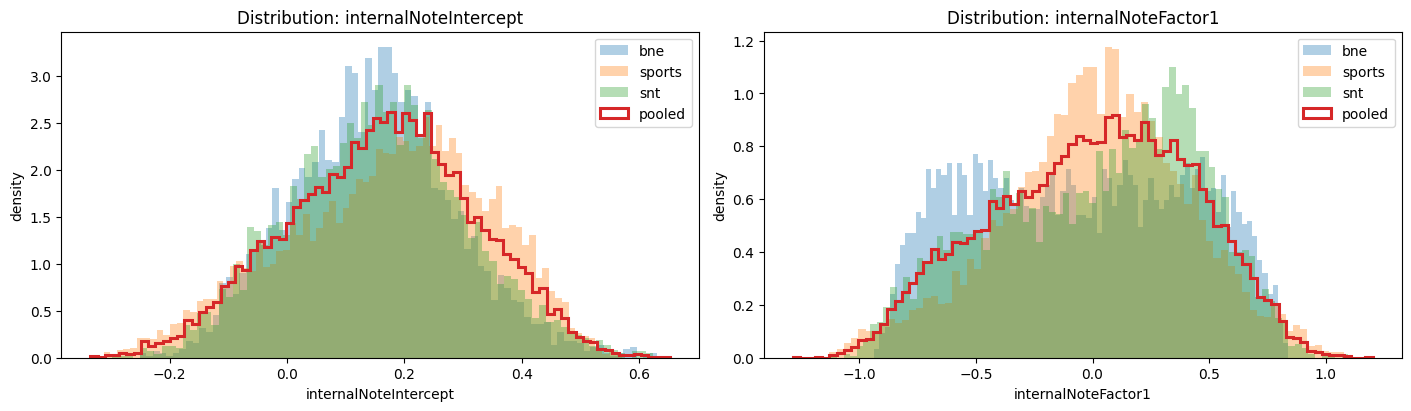

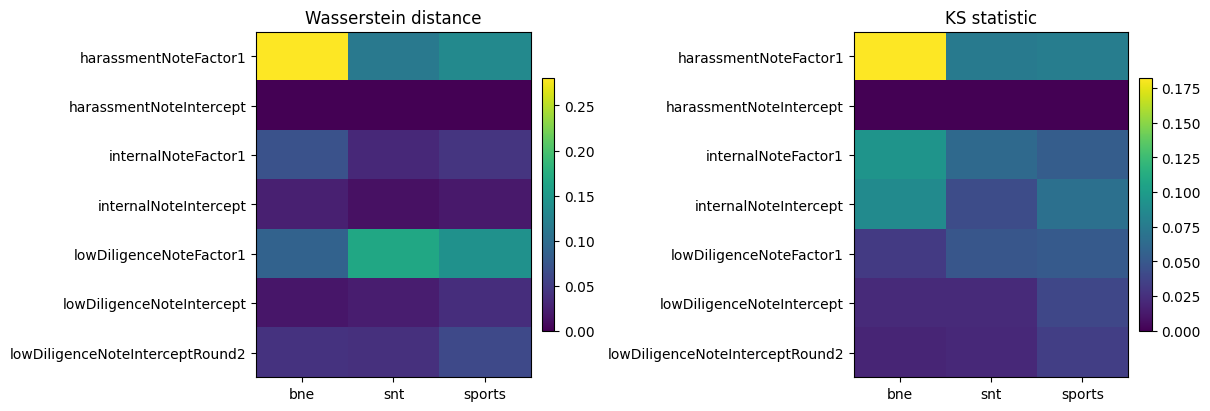

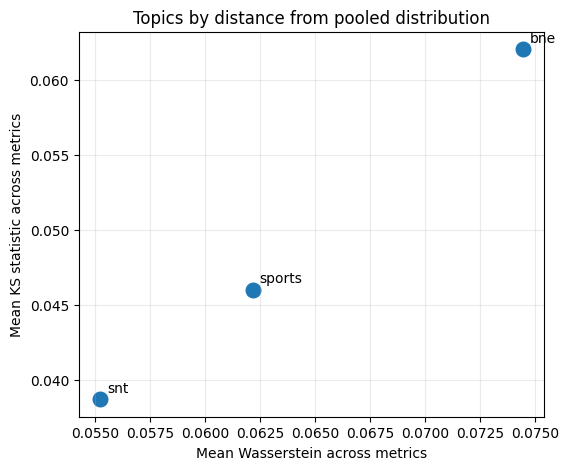


Higher spread may indicate lower agreement (coarse proxy):


,topic,std_internalNoteIntercept
1,sports,0.171430
2,snt,0.150531
0,bne,0.137509


In [4]:


# -------------------------
# Plot 1: Distribution overlays (example metrics)
# -------------------------
plot_metrics = [m for m in ["internalNoteIntercept", "internalNoteFactor1"] if m in metric_cols]
if not plot_metrics:
    plot_metrics = metric_cols[: min(2, len(metric_cols))]

fig, axes = plt.subplots(1, len(plot_metrics), figsize=(7 * len(plot_metrics), 4), constrained_layout=True)
if len(plot_metrics) == 1:
    axes = [axes]

for ax, m in zip(axes, plot_metrics):
    for t in TOPIC_LIST:
        vals = topic_frames[t][m].dropna().to_numpy()
        if len(vals) == 0:
            continue
        ax.hist(vals, bins=80, density=True, alpha=0.35, label=t)

    pooled_vals = pooled[m].dropna().to_numpy()
    ax.hist(pooled_vals, bins=80, density=True, histtype="step", linewidth=2.2, label="pooled")
    ax.set_title(f"Distribution: {m}")
    ax.set_xlabel(m)
    ax.set_ylabel("density")
    ax.legend()

plt.show()


# -------------------------
# Plot 2: Heatmaps of distances by metric/topic
# -------------------------
wd_pivot = dist_df.pivot(index="metric", columns="topic", values="wasserstein")
ks_pivot = dist_df.pivot(index="metric", columns="topic", values="ks_stat")

fig, axes = plt.subplots(1, 2, figsize=(12, max(4, 0.45 * len(metric_cols))), constrained_layout=True)

im0 = axes[0].imshow(wd_pivot.values, aspect="auto")
axes[0].set_title("Wasserstein distance")
axes[0].set_xticks(np.arange(len(wd_pivot.columns)), wd_pivot.columns)
axes[0].set_yticks(np.arange(len(wd_pivot.index)), wd_pivot.index)
plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

im1 = axes[1].imshow(ks_pivot.values, aspect="auto")
axes[1].set_title("KS statistic")
axes[1].set_xticks(np.arange(len(ks_pivot.columns)), ks_pivot.columns)
axes[1].set_yticks(np.arange(len(ks_pivot.index)), ks_pivot.index)
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()


# -------------------------
# Plot 3: Topic map by aggregate distance
# -------------------------
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(agg_df["wasserstein"], agg_df["ks_stat"], s=110)
for _, r in agg_df.iterrows():
    ax.annotate(r["topic"], (r["wasserstein"], r["ks_stat"]), xytext=(5, 5), textcoords="offset points")

ax.set_title("Topics by distance from pooled distribution")
ax.set_xlabel("Mean Wasserstein across metrics")
ax.set_ylabel("Mean KS statistic across metrics")
ax.grid(alpha=0.25)
plt.show()


# Optional: rank topics by agreement proxy using intercept spread
if "internalNoteIntercept" in metric_cols:
    spread = []
    for t in TOPIC_LIST:
        vals = topic_frames[t]["internalNoteIntercept"].dropna().to_numpy()
        spread.append({"topic": t, "std_internalNoteIntercept": float(np.std(vals))})
    spread_df = pd.DataFrame(spread).sort_values("std_internalNoteIntercept", ascending=False)
    print("\nHigher spread may indicate lower agreement (coarse proxy):")
    display(spread_df)
